# pDOS analysis of the Quantum Espresso calculations

## Table of Content <a name="TOC"></a>

1. [General setups](#setups)

2. [Run QE pDOS calculations](#run_qe) 

3. [Compute the pDOS](#compute_pdos) 

4. [Optional cleanup](#cleanup) 

### A. Learning objectives

- to compute various types of pDOS based on the QE calculations


### B. Use cases

- computing pDOS


### C. Functions

- `libra_py`  
  - `data_conv`
    - [`MATRIX2nparray`](#MATRIX2nparray)
  - `pdos`
    - [`QE_pdos`](#QE_pdos)  
    

### D. Classes and class members

None

## 1. General setups
<a name="setups"></a> [Back to TOC](#TOC)

In [1]:
import os
import sys

if sys.platform=="cygwin":
    from cyglibra_core import *
elif sys.platform=="linux" or sys.platform=="linux2":
    from liblibra_core import *

import util.libutil as comn
from libra_py import pdos, data_conv

import matplotlib.pyplot as plt   # plots
#matplotlib.use('Agg')
#%matplotlib inline 

import numpy as np
#from matplotlib.mlab import griddata

plt.rc('axes', titlesize=24)      # fontsize of the axes title
plt.rc('axes', labelsize=20)      # fontsize of the x and y labels
plt.rc('legend', fontsize=20)     # legend fontsize
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels

plt.rc('figure.subplot', left=0.2)
plt.rc('figure.subplot', right=0.95)
plt.rc('figure.subplot', bottom=0.13)
plt.rc('figure.subplot', top=0.88)

colors = {}

colors.update({"11": "#8b1a0e"})  # red       
colors.update({"12": "#FF4500"})  # orangered 
colors.update({"13": "#B22222"})  # firebrick 
colors.update({"14": "#DC143C"})  # crimson   

colors.update({"21": "#5e9c36"})  # green
colors.update({"22": "#006400"})  # darkgreen  
colors.update({"23": "#228B22"})  # forestgreen
colors.update({"24": "#808000"})  # olive      

colors.update({"31": "#8A2BE2"})  # blueviolet
colors.update({"32": "#00008B"})  # darkblue  

colors.update({"41": "#2F4F4F"})  # darkslategray

clrs_index = ["11", "21", "31", "41", "12", "22", "32", "13","23", "14", "24"]

/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for boost::python::detail::container_element<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, unsigned long, boost::python::detail::final_vector_derived_policies<std::vector<std::vector<int, std::allocator<int> >, std::allocator<std::vector<int, std::allocator<int> > > >, false> > already registered; second conversion method ignored.
  return f(*args, **kwds)
/home/alexey/Conda/Miniconda3/envs/libra/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: to-Python converter for std::vector<std::v

## 2. Run QE pDOS  calculations
<a name="run_qe"></a> [Back to TOC](#TOC)

In this tutorial, we are not going into details of the pDOS calculations with QE. It is covered in a different tutorial. However, for completeness, the input/submit/output files are included in this tutorial folder.

On the UB CCR cluster, the calculations are done with the following command:

    sbatch submit.slm

The calculations produced a set of `x.pdos_atm#*` files, which we placed into the `pdos` folder, which is presently archived.

Here, we will mimick the calculations by simply unzipping the `pdos` folder

In [2]:
os.system("unzip pdos.zip -d pdos")

256

The files in the newly created directory contain orbital-resolved densities of states. We use these files as the input to compute various kinds of pDOS

## 3. Compute the pDOS
<a name="compute_pdos"></a> [Back to TOC](#TOC)

We are going to use the `QE_pdos` function from the `libra_py.pdos` module.
    
<a name="QE_pdos"></a>

In [3]:
help(pdos.QE_pdos)

Help on function QE_pdos in module libra_py.pdos:

QE_pdos(prefix, emin, emax, de, projections, Ef, outfile_prefix, do_convolve, de_new, var, nspin=1)
    Computes various types of pDOS from the atomic state projections generated by the QE
    
    Args:
        prefix ( string ): a common prefix of the filenames for files containing the projection information
        emin ( double ): the minimal energy of the pDOS window [eV]
        emax ( double ): maximal energy of the pDOS window [eV]
        de ( double ): the original grid spacing of the pDOS [eV] (not necessarily the one used in pdos.in)
        projections ( list of lists of - see below): groups of atoms and types of projections.
            Each element of this list contains 3 sub-lists, whose intersection defines which files to use:
            e.g. projection = [["s","p"], [1,2,3], ["Cs", "Br"]] - means s and p orbitals of atoms 1, 2, and 3
            as long as any of these atoms are Cs or Br
        Ef ( double ): which 

In [4]:
E_f = 2.1608
Cd_p = [["p"], [1, 2], ["Cd"] ]
Cd_d = [["d"], [1, 2], ["Cd"] ]
Se_p = [["p"], [3, 4], ["Se"] ]
Se_d = [["d"], [3, 4], ["Se"] ]
projections = [ Cd_p, Cd_d, Se_p, Se_d ]

E, pdosa, pdosb = pdos.QE_pdos("pdos/x.pdos_atm#", -10.0, 10.0, 0.1, projections,\
                               E_f, "pdos_", 1, 0.01, 0.1, nspin=2)

multiplication factor is =  10
original grid spacing =  0.1
new grid spacing =  0.01
gaussian variance =  0.1
multiplication factor is =  10
original grid spacing =  0.1
new grid spacing =  0.01
gaussian variance =  0.1


Here, we requested to compute the densities of p and d states resolved by Cd and Se atom typels. This is defined by the projections.

**Note that we should be using the atom indices starting from 1, not from 0, when we define the projections** 

The `x.pdos.in` file used the energy grid spacing of 0.1 eV, so we use it as the input of the `de` variable in the `QE_pdos` function.

However, we want to makes the pDOS a bit more smooth, so we use the new energy grid spacing to be 0.01 eV. We also broaden each line by 0.1 eV, which is comparable to the size of the original energy grid spacing. To make a smooth plot, we turn on the convolution of the original data with the Galussians by setting the `do_convolve` argument to 1. 

Finally, our calculations were conducted as spin-polarized (unrestricted), so we need to set the `nspin` parameter to 2, to properly read the information.

We also need to set the `E_f` variable to the correct value (taken from the output of the single-point calculations), such that the pDOS we are going to plot next are centered on the Fermi energy level. 

The function `QE_pdos` retuns the new energy grid, as well as the requested alpha and beta projections, all in the MATRIX format. For convenience, we convert the MATRIX objects to numpy arrays using the `MATRIX2nparray` function:

In [5]:
e_grid = data_conv.MATRIX2nparray(E)
proja = data_conv.MATRIX2nparray(pdosa)
projb = data_conv.MATRIX2nparray(pdosb)

e_grid.shape, proja.shape, projb.shape

((2010, 1), (2010, 4), (2010, 4))

Finally, let's define a plotting function to produce nice pictures. 

This function plots the pDOSs of alpha (on positive half of the y axis) and beta (on negative one) types. 

Because the system is polarized, the alpha and beta states are different, which means the two pDOSs are not symmetric w.r.t. reflection around x axis. 

In [6]:
def plot(_energy, _pdosa, _pdosb):
    
    plt.rc('axes', titlesize=18)      # fontsize of the axes title
    plt.rc('axes', labelsize=18)      # fontsize of the x and y labels
    plt.rc('legend', fontsize=12)     # legend fontsize
    plt.rc('xtick', labelsize=18)     # fontsize of the tick labels
    plt.rc('ytick', labelsize=18)     # fontsize of the tick labels
    
    plt.ylim(-5.0, 5.0)
    plt.xlim(-5.0, 7.0)

    
    #======== Now lets plot what we have computed ===========
    plt.figure(1, figsize=(36, 24), dpi=300, frameon=False)
    
    lw = 3 
    plt.title('CdSe pDOS')
    plt.xlabel('$E - E_f, eV$')
    plt.ylabel('pDOS, 1/eV')    
    plt.plot(_energy[:,0], _pdosa[:, 0], label='Cd(p)', linewidth=lw, color = colors["11"]) 
    plt.plot(_energy[:,0], _pdosa[:, 1], label='Cd(d)', linewidth=lw, color = colors["21"]) 
    plt.plot(_energy[:,0], _pdosa[:, 2], label='Se(p)', linewidth=lw, color = colors["31"]) 
    plt.plot(_energy[:,0], _pdosa[:, 3], label='Se(d)', linewidth=lw, color = colors["41"])     
    
    plt.plot(_energy[:,0], -_pdosb[:, 0], linewidth=lw, color = colors["11"]) 
    plt.plot(_energy[:,0], -_pdosb[:, 1], linewidth=lw, color = colors["21"]) 
    plt.plot(_energy[:,0], -_pdosb[:, 2], linewidth=lw, color = colors["31"]) 
    plt.plot(_energy[:,0], -_pdosb[:, 3], linewidth=lw, color = colors["41"])     
    plt.legend()       
            
    plt.tight_layout()
    
    plt.savefig("pdos.png")        
    plt.show()
    
    plt.close()

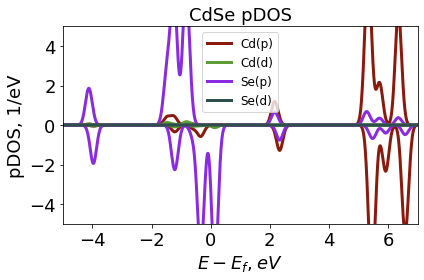

In [7]:
plot(e_grid, proja, projb)

Note that the projections are defined by meeting all 3 conditions:  orbital type, atom numbers, element type. All three criteria must be met for the projection to pick the corresponding data from the `pdos` folder (and then from a corresponding place in the file).

This can be used for convenience. For instance, in the example above, we didn't have to know the indices of Cd and Se atoms, and we could have just identified the entire range of possible indices, that is `[0,1,2,3]` and even could have gone more.

multiplication factor is =  10
original grid spacing =  0.1
new grid spacing =  0.01
gaussian variance =  0.1
multiplication factor is =  10
original grid spacing =  0.1
new grid spacing =  0.01
gaussian variance =  0.1


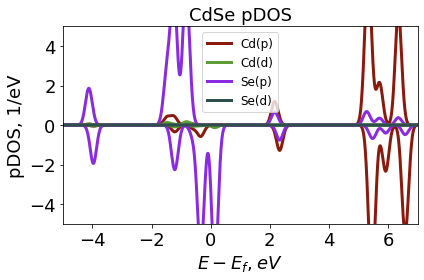

In [8]:
E_f = 2.1608
all_atoms = list(range(1,10))
Cd_p = [["p"], all_atoms, ["Cd"] ]
Cd_d = [["d"], all_atoms, ["Cd"] ]
Se_p = [["p"], all_atoms, ["Se"] ]
Se_d = [["d"], all_atoms, ["Se"] ]
projections = [ Cd_p, Cd_d, Se_p, Se_d ]

E, pdosa, pdosb = pdos.QE_pdos("pdos/x.pdos_atm#", -10.0, 10.0, 0.1, projections,\
                               E_f, "pdos_", 1, 0.01, 0.1, nspin=2)


e_grid = data_conv.MATRIX2nparray(E)
proja = data_conv.MATRIX2nparray(pdosa)
projb = data_conv.MATRIX2nparray(pdosb)


plot(e_grid, proja, projb)

Once the file is generated, we can execute ErgoSCF. For this small problem, it can be run as simple as:

## 4. Optional cleanup
<a name="cleanup"></a> [Back to TOC](#TOC)

Change 0 to 1 if you want to run the instruction below - to remove all the files that were generated by this tutorial. Be sure not to run it in a different directory (in case you may have other files with the same extension)

In [9]:
if 0:
    os.system("rm -r pdos")
    os.system("rm pdos_*")

## Exercise 1:

Using the same data, compute the element-resolved pDOS - that is pDOS of all Cd and Se states. Of course, separately for alpha and beta channels.

## Exercise 2:

Using the same data, compute the orbital-type-resolved pDOS - that is pDOSs for "s", "p", and "d"-type orbitals, no matter which element type. 

## Exercise 3:

Using the same data, compute the total DOS for this system.